In [1]:
import cptac
cptac.download(dataset="Luad")
lung = cptac.Luad()

In [2]:
protein_data = lung.get_proteomics()

In [3]:
# import packages here
import numpy as np
import pandas as pd

In [4]:
# columns was a multiset, so used for loop to extract 1st item in each list which are the protein names
protein_columns = protein_data.columns
new_protein_columns = list()
for i in range(len(protein_columns)):
    new_protein_columns.append(protein_columns[i][0])

In [5]:
rna_data = lung.get_transcriptomics()
clinical_data = lung.get_clinical()

In [6]:
name_intersects = [
    np.intersect1d(protein_data.index , rna_data.index), 
    np.intersect1d(protein_data.index , clinical_data.index), 
    np.intersect1d(rna_data.index , clinical_data.index), 
]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [9]:
shared_rna_prot = np.intersect1d(rna_data.columns, new_protein_columns)

rna_shared = rna_data.loc[name_intersects[0], shared_rna_prot]
prot_shared = protein_data.loc[name_intersects[0], shared_rna_prot]
prot_shared.columns = prot_shared.columns.droplevel(1)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

gene = "GSTM1" # this will save you some typing and make the code more flexible for exploring other genes

# get correlation and print
corr, pval = stats.spearmanr(
    rna_shared[gene], 
    prot_shared[gene], 
    nan_policy="omit")

print(f"The correlation is {round(corr, 3)} (p = {round(pval, 6)}).")
#print(rna_shared[gene])
#prot_shared

# create scatter plot
fig, ax = plt.subplots(1,1)
sns.scatterplot(
    x = rna_shared[gene], 
    y = prot_shared[gene], 
    ax = ax
)

ax.set(xlabel = "RNA", ylabel = "Protein")

plt.show()

NameError: name 'rna_shared' is not defined

## Heatmaps
A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the `heatmap()` function from seaborn (the `cluster()` function is closely related; the difference is that `clustermap()` will reorganize the rows/columns so that similar rows/columns are grouped near each other). Let's do the following: 

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call `clustermap()` -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

['CYP1A1', 'GSTM1', 'MSH5']


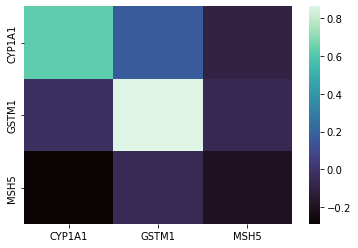

In [19]:
gene_names = ["CYP1A1", "GSTM1", "MSH5"]
print(gene_names)

corr_df = pd.DataFrame(np.ndarray(shape=(3, 3), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr, pval = stats.spearmanr(
        rna_shared[g1], 
        prot_shared[g2], 
        nan_policy="omit")
        
        corr_df.loc[g1,g2] = corr

# 3. create the heat map
sns.heatmap(
    corr_df,
    cmap='mako'
)

plt.show()
#plt.savefig('heatmap.png', bbox_inches='tight')
 

### Saving pandas dataframes
While you can certainly reload in the data every time you wish to use it, we also want to make sure you know how to save and read in a pandas dataframes. We will utilize the `to_csv()` function and `read_csv()` function. Notice in the `read_csv()` function we utilize the `index_col` argument. To observe what this argument does, try removing it and looking at the dataframe. Notice what the index values are. 

**Exercise**. To save our data:
1. Make a folder in your `analysis_data` folder called `cptac`.
2. Edit the path to save into `analysis_data`
3. Also save the RNA and clinical data as well to the same directory (with the same name convention).

In [30]:
# RENAME the path to analysis_data!
protein_data.to_csv("/Users/sabrinazhong/Desktop/USC/Spring_2022/QBIO490/qbio_data_analysis_sabrinaz/analysis_data/cptac/cptac_protein.csv")
protein_data_read_example = pd.read_csv("/Users/sabrinazhong/Desktop/USC/Spring_2022/QBIO490/qbio_data_analysis_sabrinaz/analysis_data/cptac/cptac_protein.csv", index_col=0)
protein_data_read_example

# Repeat with clinical and RNA
rna_data.to_csv("/Users/sabrinazhong/Desktop/USC/Spring_2022/QBIO490/qbio_data_analysis_sabrinaz/analysis_data/cptac/cptac_rna.csv")
rna_data_read_example = pd.read_csv("/Users/sabrinazhong/Desktop/USC/Spring_2022/QBIO490/qbio_data_analysis_sabrinaz/analysis_data/cptac/cptac_rna.csv", index_col=0)
rna_data_read_example

,A1CF,A2M,A4GALT,AAAS,AACS,AADACP1,AADAT,AAED1,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO001,10.1984,13.8117,7.0224,9.4115,9.7432,4.5850,8.4635,7.6221,11.2336,8.3219,...,10.1046,10.5765,10.5294,7.0553,8.4263,8.6865,10.0307,9.1699,10.2784,10.4263
01CO005,10.1586,12.6434,6.7279,8.9972,9.9084,4.7004,8.2046,7.0768,10.5362,9.6402,...,9.6883,9.3264,9.2808,7.1799,9.2946,9.1799,9.8408,10.5622,10.4512,10.4305
01CO006,9.2119,15.0040,6.8580,9.7056,9.1997,5.0000,8.4676,7.1293,10.9337,9.5661,...,9.8424,9.8611,10.2107,7.6582,8.7415,9.0741,10.3309,10.0512,10.2703,10.5430
01CO008,10.7322,13.9284,4.9542,9.1497,8.9425,6.0224,7.4179,7.7074,10.7194,9.3376,...,9.6812,9.0795,9.5118,8.9159,9.9542,10.0168,10.3365,9.9307,10.2538,10.8925
01CO013,9.7160,12.9963,6.3576,9.6202,9.2738,4.1699,7.0980,5.9069,10.2252,9.7944,...,10.1344,9.3174,10.0238,7.4429,8.7381,9.6165,10.3848,11.3066,11.2174,10.7616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO007,10.0768,13.4762,6.4594,9.6018,9.1573,5.0000,7.6865,6.2095,10.9159,10.9315,...,10.1293,9.5622,10.2958,7.5314,8.3707,8.8202,9.8234,9.4136,9.7245,10.6777
22CO004,10.9293,12.6131,5.5236,9.3332,9.2877,5.0000,7.3663,6.8580,10.9031,8.8361,...,9.9687,9.5736,10.5108,8.4346,9.0768,8.8857,10.2715,9.4737,9.6511,10.9114
22CO006,9.2432,14.2620,7.5546,9.3264,8.7039,5.5546,7.3129,8.0389,11.1592,9.2597,...,9.8903,9.9972,10.1923,7.4998,8.1447,8.7582,10.1497,10.4062,10.2491,10.3902
